Tayyaba Bagwan                     Rollno:3           Practicalno:3

Convolutional neural network (CNN):Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers


In [3]:
# Load the training data
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [4]:
# Separate features and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [5]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Reshape to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7701 - loss: 0.6366 - val_accuracy: 0.8858 - val_loss: 0.3195
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8841 - loss: 0.3166 - val_accuracy: 0.8977 - val_loss: 0.2865
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9048 - loss: 0.2601 - val_accuracy: 0.9024 - val_loss: 0.2590
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9155 - loss: 0.2286 - val_accuracy: 0.9111 - val_loss: 0.2425
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9234 - loss: 0.2050 - val_accuracy: 0.9133 - val_loss: 0.2449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9307 - loss: 0.1828 - val_accuracy: 0.9158 - val_loss: 0.2316
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9415 - loss: 0.1604 - val_accuracy: 0.9178 - val_loss: 0.2395
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9474 -

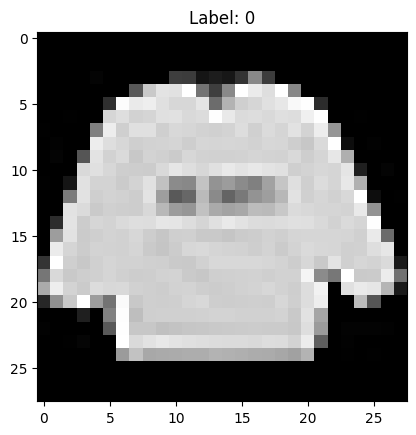

In [13]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

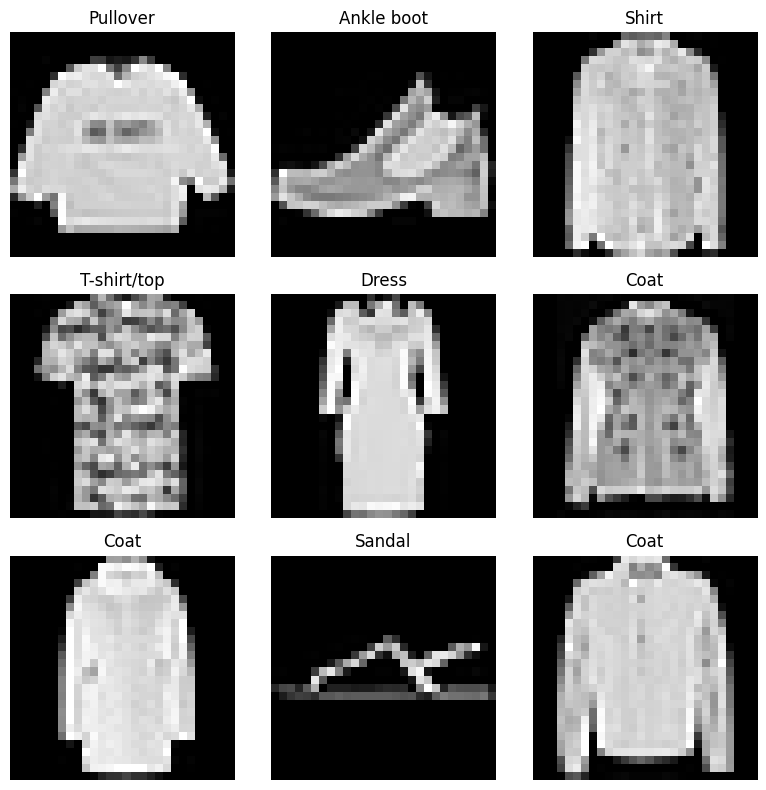

In [14]:
# Define class names (from 0 to 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 9 images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    # If using one-hot labels
    if y_train.ndim == 2:
        label_index = np.argmax(y_train[i])
    else:
        label_index = y_train[i]
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()